Anomalies: [3, 21, 25, 30, 33, 38, 43, 64, 67, 83]


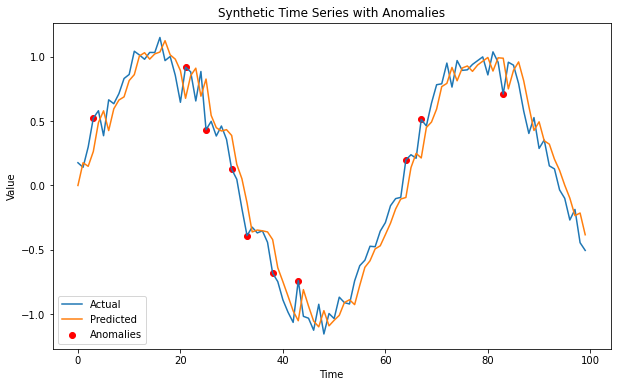

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Create a synthetic time series dataset
np.random.seed(0)
time_steps = 100
true_values = np.sin(np.linspace(0, 10, time_steps)) + np.random.normal(0, 0.1, time_steps)
data = pd.Series(true_values)

# Fit an ARIMA model
order = (1, 1, 1)  # ARIMA order (p, d, q)
model = ARIMA(data, order=order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.get_prediction(start=0, end=len(data)-1).predicted_mean

# Calculate residuals
residuals = data - predictions

# Calculate quantiles of residuals
quantiles = np.percentile(residuals, [5, 95])  # Adjust percentiles as needed

# Set anomaly thresholds based on quantiles
anomaly_threshold_lower = quantiles[0]
anomaly_threshold_upper = quantiles[1]

# Identify anomalies
anomalies = [i for i, res in enumerate(residuals) if res > anomaly_threshold_upper or res < anomaly_threshold_lower]

# Print anomalies and visualization
print("Anomalies:", anomalies)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.scatter(anomalies, data[anomalies], color='red', marker='o', label='Anomalies')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Time Series with Anomalies')
plt.show()



In [2]:
#true_values

In [3]:
data

0     0.176405
1     0.140854
2     0.298523
3     0.522503
4     0.579892
        ...   
95   -0.099690
96   -0.267793
97   -0.186012
98   -0.443946
99   -0.503822
Length: 100, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


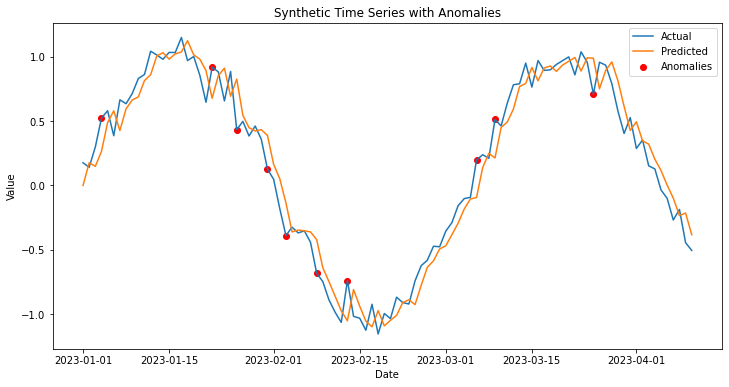

In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create a synthetic time series dataset with datetime
np.random.seed(0)
time_steps = 100
date_range = pd.date_range(start='2023-01-01', periods=time_steps, freq='D')
true_values = np.sin(np.linspace(0, 10, time_steps)) + np.random.normal(0, 0.1, time_steps)
data = pd.DataFrame({'Date': date_range, 'Value': true_values})

# Set the datetime column as the index
data.set_index('Date', inplace=True)

# Fit an ARIMA model
order = (1, 1, 1)  # ARIMA order (p, d, q)
model = ARIMA(data['Value'], order=order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.get_prediction(start=0, end=len(data)-1).predicted_mean

# Calculate residuals
residuals = data['Value'] - predictions

# Calculate quantiles of residuals
quantiles = np.percentile(residuals, [5, 95])  # Adjust percentiles as needed

# Set anomaly thresholds based on quantiles
anomaly_threshold_lower = quantiles[0]
anomaly_threshold_upper = quantiles[1]

# Identify anomalies
anomalies = data[(residuals > anomaly_threshold_upper) | (residuals < anomaly_threshold_lower)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Value'], label='Actual')
plt.plot(data.index, predictions, label='Predicted')
plt.scatter(anomalies.index, anomalies['Value'], color='red', marker='o', label='Anomalies')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Synthetic Time Series with Anomalies')
plt.show()


In [5]:
predictions

2023-01-01    0.000000
2023-01-02    0.176405
2023-01-03    0.148747
2023-01-04    0.263479
2023-01-05    0.487917
                ...   
2023-04-06    0.002597
2023-04-07   -0.098266
2023-04-08   -0.233878
2023-04-09   -0.213629
2023-04-10   -0.382334
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

In [6]:
data

,Value
Date,
2023-01-01,0.176405
2023-01-02,0.140854
2023-01-03,0.298523
2023-01-04,0.522503
2023-01-05,0.579892
...,...
2023-04-06,-0.099690
2023-04-07,-0.267793
2023-04-08,-0.186012
